In [1]:
! pip install -q kaggle

In [2]:
!pip install split-folders

In [3]:
from PIL import Image
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.callbacks import EarlyStopping
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, GlobalAveragePooling2D, GlobalMaxPooling1D, Dropout
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.initializers import HeNormal
from tensorflow.keras.applications.inception_v3 import InceptionV3

import matplotlib.pyplot as plt
import numpy as np
import splitfolders
import os
import shutil

In [4]:
# kaggle.json contains the necessary API username and key to use Kaggle
!ls -lha kaggle.json &> /dev/null 

In [5]:
!mkdir -p ~/.kaggle

In [6]:
!cp kaggle.json ~/.kaggle/

In [7]:
# hides Kaggle API key from users on server
!chmod 600 /root/.kaggle/kaggle.json

In [8]:
!kaggle datasets download -d iamsouravbanerjee/indian-food-images-dataset &> /dev/null 
!kaggle datasets download -d anshulmehtakaggl/themassiveindianfooddataset &> /dev/null 


In [9]:
!mkdir our_data

In [10]:
!unzip /content/indian-food-images-dataset.zip &> /dev/null 
!unzip /content/themassiveindianfooddataset.zip &> /dev/null

In [11]:
!mkdir "/content/dataset1"
!mkdir "/content/dataset2"

In [12]:
# splitfolders will split folders into train, valid, and test folders
splitfolders.ratio('/content/Indian Food Images/Indian Food Images', output="/content/dataset1", seed=1337, ratio=(.4, 0.4,0.2)) 

Copying files: 4000 files [00:01, 2634.23 files/s]


In [13]:
!mv /content/Biryani-resize /content/our_data/
!mv /content/Chole-Bhature-Resized /content/our_data/
!mv /content/Jalebi-Resize /content/our_data/
!mv /content/Kofta-Resized /content/our_data/
!mv /content/Naan-Resized /content/our_data/
!mv /content/Paneer-Tikka-resized /content/our_data/
!mv /content/Pani-Puri-resize /content/our_data/
!mv /content/Pav-Bhaji-Resized/ /content/our_data/
!mv /content/Vadapav-Resized/ /content/our_data/
!mv /content/dabeli-resize /content/our_data/
!mv /content/dal_resized /content/our_data/
!mv /content/dhokla-resize /content/our_data/
!mv /content/dosa_resized /content/our_data/
!mv /content/kathi-resize /content/our_data/
!mv /content/pakora-resize /content/our_data/

In [14]:
def moveFiles(source_folder, destination_folder):
  # fetch all files
  for file_name in os.listdir(source_folder):
      file_name_jpg = file_name[:-4] + ".jpg"

      # construct full file path
      source = source_folder + file_name

      ### convert .png to .jpg
      im1 = Image.open(r"{}".format(source))
      # remove alpha channel (RGBA)
      im1 = im1.convert('RGB')

      jpg_filepath = source_folder + file_name_jpg
      im1.save(r"{}".format(jpg_filepath))
      ### 

      source_jpg = source_folder + file_name_jpg
      destination = destination_folder + file_name_jpg

      # move only .jpg files
      if os.path.isfile(source_jpg):
          shutil.move(source_jpg, destination)

In [15]:
moveFiles("/content/our_data/Biryani-resize/resize/","/content/our_data/Biryani-resize/") 
moveFiles("/content/our_data/Chole-Bhature-Resized/Chole-Bhature-Resized/","/content/our_data/Chole-Bhature-Resized/")
moveFiles("/content/our_data/Jalebi-Resize/Jalebi-Resize/","/content/our_data/Jalebi-Resize/")
moveFiles("/content/our_data/Kofta-Resized/Kofta-Resized/","/content/our_data/Kofta-Resized/")
moveFiles("/content/our_data/Naan-Resized/Naan-Resized/","/content/our_data/Naan-Resized/")
moveFiles("/content/our_data/Paneer-Tikka-resized/Paneer-Tikka-resized/","/content/our_data/Paneer-Tikka-resized/")
moveFiles("/content/our_data/Pani-Puri-resize/resize/","/content/our_data/Pani-Puri-resize/")
moveFiles("/content/our_data/Pav-Bhaji-Resized/Pav-Bhaji-Resized/","/content/our_data/Pav-Bhaji-Resized/")
moveFiles("/content/our_data/Vadapav-Resized/Vadapav-Resized/","/content/our_data/Vadapav-Resized/")
moveFiles("/content/our_data/dal_resized/dal_resized/","/content/our_data/dal_resized/")
moveFiles("/content/our_data/pakora-resize/pakora-resize/","/content/our_data/pakora-resize/")
moveFiles("/content/our_data/dhokla-resize/dhokla-resize/","/content/our_data/dhokla-resize/")
moveFiles("/content/our_data/dosa_resized/dosa_resized/","/content/our_data/dosa_resized/")
moveFiles("/content/our_data/dabeli-resize/dabeli-resize/","/content/our_data/dabeli-resize/")
moveFiles("/content/our_data/kathi-resize/kathi-resize/","/content/our_data/kathi-resize/")

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [16]:
!rm -rf "/content/our_data/Biryani-resize/resize/" 
!rm -rf "/content/our_data/Chole-Bhature-Resized/Chole-Bhature-Resized/" 
!rm -rf "/content/our_data/Jalebi-Resize/Jalebi-Resize/"
!rm -rf "/content/our_data/Kofta-Resized/Kofta-Resized/"
!rm -rf "/content/our_data/Naan-Resized/Naan-Resized/"
!rm -rf "/content/our_data/Paneer-Tikka-resized/Paneer-Tikka-resized/"
!rm -rf "/content/our_data/Pani-Puri-resize/resize/"
!rm -rf "/content/our_data/Pav-Bhaji-Resized/Pav-Bhaji-Resized/"
!rm -rf "/content/our_data/Vadapav-Resized/Vadapav-Resized/"
!rm -rf "/content/our_data/dal_resized/dal_resized/"
!rm -rf "/content/our_data/pakora-resize/pakora-resize/"
!rm -rf "/content/our_data/dhokla-resize/dhokla-resize/"
!rm -rf "/content/our_data/dosa_resized/dosa_resized/"
!rm -rf "/content/our_data/dabeli-resize/dabeli-resize/"
!rm -rf "/content/our_data/kathi-resize/kathi-resize/"

In [17]:
splitfolders.ratio('/content/our_data', output="/content/dataset2", seed=1337, ratio=(.4, 0.4,0.2)) 

Copying files: 4770 files [00:00, 6440.60 files/s]


In [18]:
# move all files into the folder our_data
with open("List of Indian Foods.txt", "r") as a_file:
  for line in a_file:
    stripped_line = line.strip()
    !mv "/content/Indian Food Images/Indian Food Images/{stripped_line}" "/content/our_data" &> /dev/null 



In [19]:
# most subfolders were not removed from the Indian Food Images folder, so we repeat the process
with open("List of Indian Foods.txt", "r") as a_file:
  for line in a_file:
    stripped_line = line.strip()
    !mv "/content/our_data/Indian Food Images/{stripped_line}" "/content/our_data" &> /dev/null 

In [20]:
# make new folders for same resize-named folders 
!mkdir "/content/our_data/chole_bhature"
!mkdir "/content/our_data/paneer_tikka"
!mkdir "/content/our_data/paneer_puri"
!mkdir "/content/our_data/pav_bhaji"
!mkdir "/content/our_data/vadapav"
!mkdir "/content/our_data/dal"
!mkdir "/content/our_data/pakora"
!mkdir "/content/our_data/dhokla"
!mkdir "/content/our_data/dosa"
!mkdir "/content/our_data/dabeli"
!mkdir "/content/our_data/kathi"

In [21]:
!rm -rf themassiveindianfooddataset.zip indian-food-images-dataset.zip sample_data/ food20dataset

In [22]:
# delete unneeded folders
!rm -rf "/content/Indian Food Images/"
!rm -rf "/content/our_data/Indian Food Images/"

In [23]:
moveFiles("/content/our_data/Biryani-resize/","/content/our_data/biryani/") 
moveFiles("/content/our_data/Chole-Bhature-Resized/","/content/our_data/chole_bhature/")
moveFiles("/content/our_data/Jalebi-Resize/","/content/our_data/jalebi/")
moveFiles("/content/our_data/Kofta-Resized/","/content/our_data/kofta/")
moveFiles("/content/our_data/Naan-Resized/","/content/our_data/naan/")
moveFiles("/content/our_data/Paneer-Tikka-resized/","/content/our_data/paneer_tikka/")
moveFiles("/content/our_data/Pani-Puri-resize/","/content/our_data/paneer_puri/")
moveFiles("/content/our_data/Pav-Bhaji-Resized/","/content/our_data/pav_bhaji/")
moveFiles("/content/our_data/Vadapav-Resized/","/content/our_data/vadapav/")
moveFiles("/content/our_data/dal_resized/","/content/our_data/dal/")
moveFiles("/content/our_data/pakora-resize/","/content/our_data/pakora/")
moveFiles("/content/our_data/dhokla-resize/","/content/our_data/dhokla/")
moveFiles("/content/our_data/dosa_resized/","/content/our_data/dosa/")
moveFiles("/content/our_data/dabeli-resize/","/content/our_data/dabeli/")
moveFiles("/content/our_data/kathi-resize/","/content/our_data/kathi/")

In [24]:
# remove unnecessary folders after moving files
!rm -rf "/content/our_data/kathi-resize/" "/content/our_data/dabeli-resize" "/content/our_data/dosa_resized" "/content/our_data/dhokla-resize/" "/content/our_data/pakora-resize/" "/content/our_data/dal_resized/" "/content/our_data/Vadapav-Resized/" "/content/our_data/Biryani-resize/" "/content/our_data/Chole-Bhature-Resized/" "/content/our_data/Jalebi-Resize/" "/content/our_data/Kofta-Resized/" "/content/our_data/Naan-Resized/" "/content/our_data/Paneer-Tikka-resized/" "/content/our_data/Pani-Puri-resize/" "/content/our_data/Pav-Bhaji-Resized/"

In [25]:
#split folders that have both datasets
splitfolders.ratio('/content/our_data/', output="/content/our_data", seed=1337, ratio=(.4, 0.4,0.2)) 


Copying files: 8770 files [00:02, 4310.22 files/s]


In [26]:
batch_size = 32
number_of_epochs = 100

In [27]:
# preprocessing: data augmentation, dataset 1
datagen1_train = ImageDataGenerator(
    rotation_range=10,  
    zoom_range=0.2, 
    width_shift_range=0.4,  
    height_shift_range=0.1, 
    horizontal_flip=True, 
    vertical_flip=True,
    rescale = 1./255,
)  

datagen1_valid = ImageDataGenerator(rescale = 1./255,)

# input matrices
# load and iterate training dataset
train_data1 = datagen1_train.flow_from_directory(
    "/content/dataset1/train/",
    target_size=(224, 224),
    batch_size=batch_size,
    color_mode="rgb",
    class_mode="categorical",
)
# load and iterate validation dataset
valid_data1 = datagen1_valid.flow_from_directory(
    "/content/dataset1/val/",
    target_size=(224, 224),
    batch_size=batch_size,
    color_mode="rgb",
    class_mode="categorical",
)



Found 1600 images belonging to 80 classes.
Found 1600 images belonging to 80 classes.


In [28]:
# preprocessing: data augmentation, dataset 2
datagen2_train = ImageDataGenerator(
    rotation_range=10,  
    zoom_range=0.2, 
    width_shift_range=0.4,  
    height_shift_range=0.1, 
    horizontal_flip=True, 
    vertical_flip=True,
    rescale = 1./255,
)  

datagen2_valid = ImageDataGenerator(rescale = 1./255,)

# input matrices
# load and iterate training dataset
train_data2 = datagen2_train.flow_from_directory(
    "/content/dataset2/train/",
    target_size=(224, 224),
    batch_size=batch_size,
    color_mode="rgb",
    class_mode="categorical",
)
# load and iterate validation dataset
valid_data2 = datagen2_valid.flow_from_directory(
    "/content/dataset2/val/",
    target_size=(224, 224),
    batch_size=batch_size,
    color_mode="rgb",
    class_mode="categorical",
)



Found 1902 images belonging to 15 classes.
Found 1902 images belonging to 15 classes.


In [29]:
# preprocessing: data augmentation, both datasets
datagen_both_train = ImageDataGenerator(
    rotation_range=10,  
    zoom_range=0.2, 
    width_shift_range=0.4,  
    height_shift_range=0.1, 
    horizontal_flip=True, 
    vertical_flip=True,
    rescale = 1./255,
)  

datagen_both_valid = ImageDataGenerator(rescale = 1./255,)

# input matrices
# load and iterate training dataset
train_both = datagen_both_train.flow_from_directory(
    "/content/our_data/train/",
    target_size=(224, 224),
    batch_size=batch_size,
    color_mode="rgb",
    class_mode="categorical",
)
# load and iterate validation dataset
valid_both = datagen_both_valid.flow_from_directory(
    "/content/our_data/val/",
    target_size=(224, 224),
    batch_size=batch_size,
    color_mode="rgb",
    class_mode="categorical",
)

Found 3502 images belonging to 91 classes.
Found 3502 images belonging to 91 classes.


In [30]:
data1_size = 1600
data1_classes = 80

data2_size = 1902
data2_classes = 15

data_both_size = 3502
data_both_classes = 91

In [31]:
datagen_test = ImageDataGenerator(rescale = 1./255,)
test_data1 = datagen_test.flow_from_directory(
    "/content/dataset1/test/",
    target_size=(224, 224),
    batch_size=batch_size,
    color_mode="rgb",
    class_mode="categorical",
    shuffle = False,
)

test_data2 = datagen_test.flow_from_directory(
    "/content/dataset2/test/",
    target_size=(224, 224),
    batch_size=batch_size,
    color_mode="rgb",
    class_mode="categorical",
     shuffle = False,
)

test_data_both = datagen_test.flow_from_directory(
    "/content/our_data/test/",
    target_size=(224, 224),
    batch_size=batch_size,
    color_mode="rgb",
    class_mode="categorical",
     shuffle = False,
)

Found 800 images belonging to 80 classes.
Found 966 images belonging to 15 classes.
Found 1766 images belonging to 91 classes.


In [32]:
#callback for all experiments
es = EarlyStopping(patience=10, restore_best_weights=True)

Experiment 1 - Random Model

In [33]:
# 1st random experiment with Dataset 1

model = Sequential()
model.add(GlobalAveragePooling2D())
model.add(Dense(256, activation='relu', kernel_initializer=HeNormal()))
model.add(Dense(128, activation='relu', kernel_initializer=HeNormal()))
model.add(Dense(data1_classes, kernel_initializer = 'glorot_normal',activation='softmax'))

optimizer = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['categorical_accuracy'])

In [34]:
model.fit(train_data1,
          steps_per_epoch=data1_size/batch_size,
          validation_data=valid_data1,
          validation_steps=data1_size/batch_size,
          epochs=number_of_epochs,
          callbacks=[es])

Epoch 1/100
50/50 [==============================] - 50s 986ms/step - loss: 4.4191 - categorical_accuracy: 0.0031 - val_loss: 4.3824 - val_categorical_accuracy: 0.0125
Epoch 2/100
50/50 [==============================] - 49s 982ms/step - loss: 4.3876 - categorical_accuracy: 0.0050 - val_loss: 4.3823 - val_categorical_accuracy: 0.0125
Epoch 3/100
50/50 [==============================] - 49s 991ms/step - loss: 4.3879 - categorical_accuracy: 0.0056 - val_loss: 4.3822 - val_categorical_accuracy: 0.0125
Epoch 4/100
50/50 [==============================] - 50s 1s/step - loss: 4.3873 - categorical_accuracy: 0.0075 - val_loss: 4.3822 - val_categorical_accuracy: 0.0125
Epoch 5/100
50/50 [==============================] - 49s 987ms/step - loss: 4.3872 - categorical_accuracy: 0.0056 - val_loss: 4.3821 - val_categorical_accuracy: 0.0125
Epoch 6/100
50/50 [==============================] - 49s 988ms/step - loss: 4.3873 - categorical_accuracy: 0.0075 - val_loss: 4.3821 - val_categorical_accuracy: 0.

In [35]:
print(model.evaluate(test_data1))

25/25 [==============================] - 8s 304ms/step - loss: 4.3821 - categorical_accuracy: 0.0125
[4.382117748260498, 0.012500000186264515]


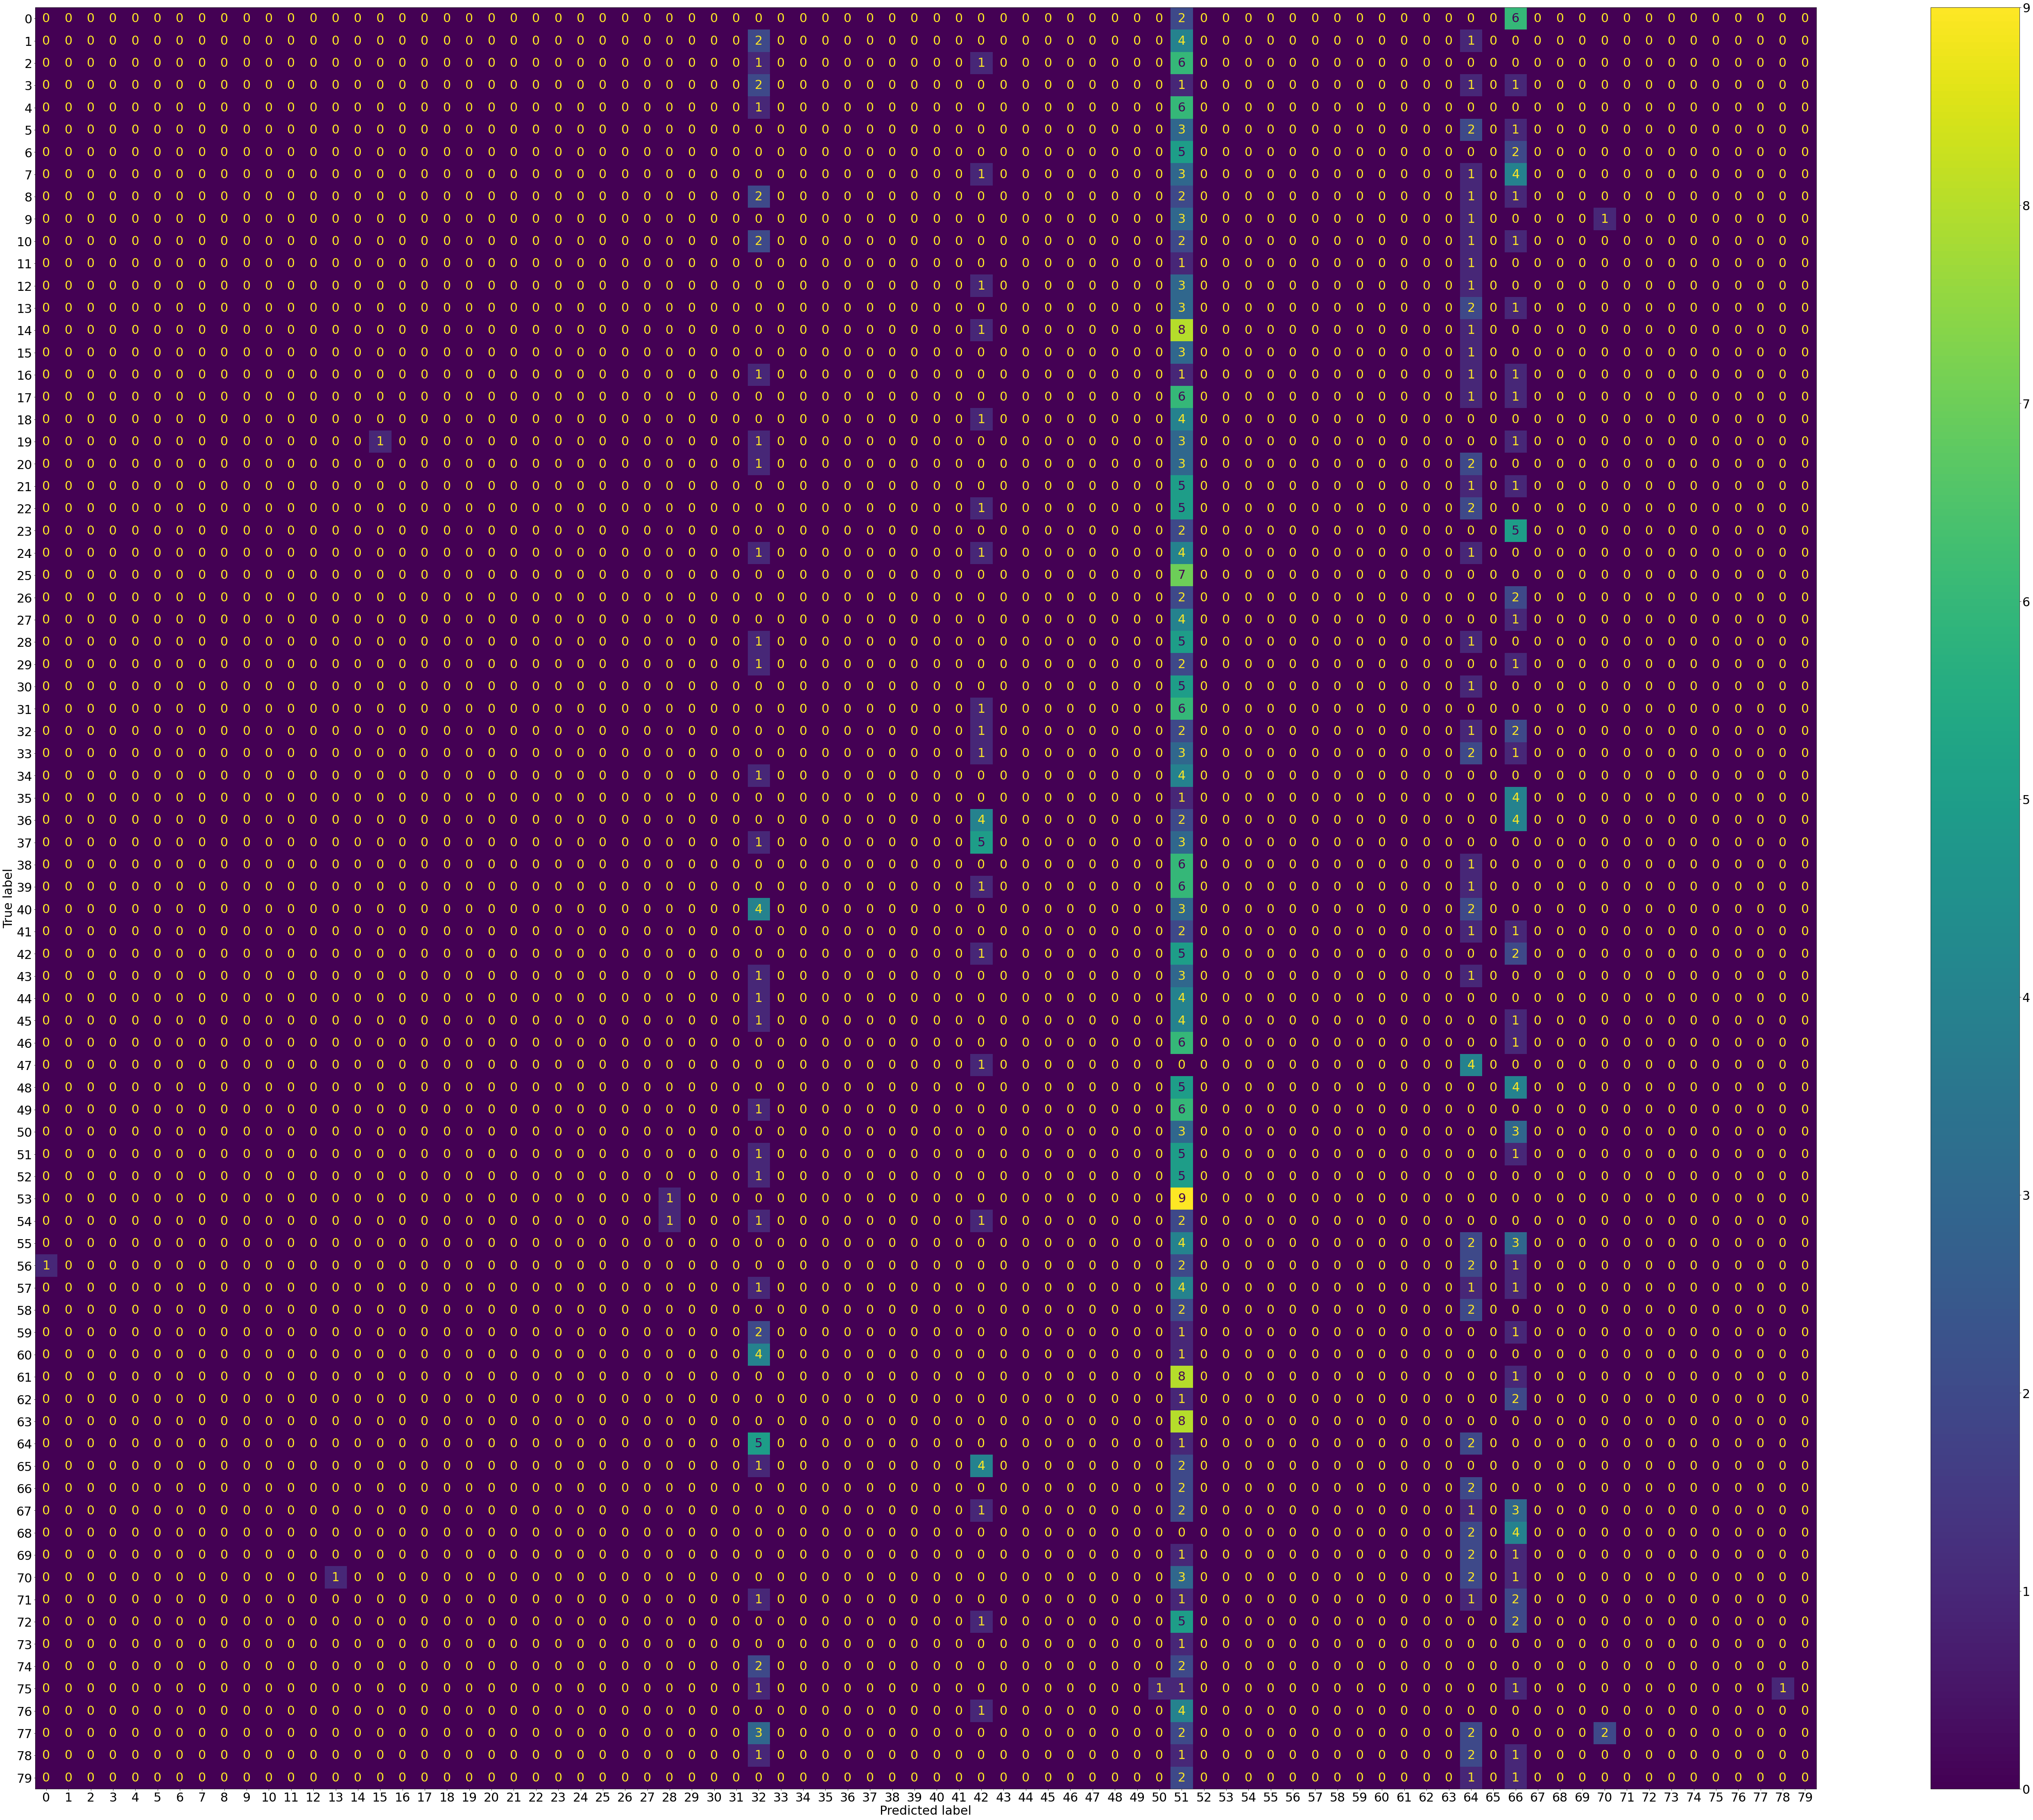

In [50]:
# random, test data 1

y_pred = model.predict(test_data1, data1_size/(batch_size))
y_pred = np.argmax(y_pred, axis=1)

label_list = list(range(data1_classes))

cm = confusion_matrix(test_data1.classes, y_pred, labels=label_list)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.rcParams.update({'figure.figsize': (100, 70 )})
plt.rcParams.update({'font.size': 30})
plt.show()

In [51]:
print(classification_report(test_data1.classes, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.00      0.00      0.00        10
           2       0.00      0.00      0.00        10
           3       0.00      0.00      0.00        10
           4       0.00      0.00      0.00        10
           5       0.00      0.00      0.00        10
           6       0.00      0.00      0.00        10
           7       0.00      0.00      0.00        10
           8       0.00      0.00      0.00        10
           9       0.00      0.00      0.00        10
          10       0.00      0.00      0.00        10
          11       0.00      0.00      0.00        10
          12       0.00      0.00      0.00        10
          13       0.00      0.00      0.00        10
          14       0.00      0.00      0.00        10
          15       0.00      0.00      0.00        10
          16       0.00      0.00      0.00        10
          17       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

In [39]:
#1st experiment with Dataset 2
model = Sequential()
model.add(GlobalAveragePooling2D())
model.add(Dense(256, activation='relu', kernel_initializer=HeNormal()))
model.add(Dense(128, activation='relu', kernel_initializer=HeNormal()))
model.add(Dense(data2_classes, kernel_initializer = 'glorot_normal',activation='softmax'))

optimizer = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['categorical_accuracy'])

In [40]:
model.fit(train_data2,
          steps_per_epoch=data2_size/batch_size,
          validation_data=valid_data2,
          validation_steps=data2_size/batch_size,
          epochs=number_of_epochs,
          callbacks=[es])

Epoch 1/100
59/59 [==============================] - 37s 620ms/step - loss: 2.6739 - categorical_accuracy: 0.1351 - val_loss: 2.5707 - val_categorical_accuracy: 0.1619
Epoch 2/100
59/59 [==============================] - 31s 521ms/step - loss: 2.5780 - categorical_accuracy: 0.1551 - val_loss: 2.5527 - val_categorical_accuracy: 0.1688
Epoch 3/100
59/59 [==============================] - 36s 605ms/step - loss: 2.5656 - categorical_accuracy: 0.1540 - val_loss: 2.5471 - val_categorical_accuracy: 0.1688
Epoch 4/100
59/59 [==============================] - 31s 520ms/step - loss: 2.5532 - categorical_accuracy: 0.1640 - val_loss: 2.5279 - val_categorical_accuracy: 0.1682
Epoch 5/100
59/59 [==============================] - 32s 534ms/step - loss: 2.5270 - categorical_accuracy: 0.1593 - val_loss: 2.5059 - val_categorical_accuracy: 0.1751
Epoch 6/100
59/59 [==============================] - 31s 528ms/step - loss: 2.5223 - categorical_accuracy: 0.1756 - val_loss: 2.5160 - val_categorical_accuracy:

In [41]:
print(model.evaluate(test_data2))

31/31 [==============================] - 3s 92ms/step - loss: 2.4643 - categorical_accuracy: 0.1925
[2.4642746448516846, 0.19254659116268158]


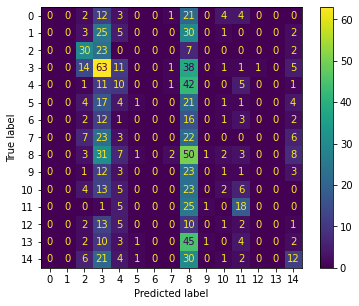

In [42]:
# random, test data 2

y_pred = model.predict(test_data2, data2_size/(batch_size))
y_pred = np.argmax(y_pred, axis=1)

label_list = list(range(data2_classes))

cm = confusion_matrix(test_data2.classes, y_pred, labels=label_list)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
plt.rcParams.update({'figure.figsize': (6.4, 4.8 )})
plt.rcParams.update({'font.size': 10})
disp.plot()

plt.show()

In [43]:
print(classification_report(test_data2.classes, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        47
           1       0.00      0.00      0.00        66
           2       0.37      0.48      0.42        62
           3       0.22      0.47      0.30       135
           4       0.14      0.14      0.14        71
           5       0.25      0.02      0.04        53
           6       0.00      0.00      0.00        37
           7       0.00      0.00      0.00        61
           8       0.12      0.46      0.20       108
           9       0.00      0.00      0.00        44
          10       0.13      0.04      0.06        53
          11       0.36      0.36      0.36        50
          12       0.00      0.00      0.00        34
          13       0.00      0.00      0.00        68
          14       0.25      0.16      0.19        77

    accuracy                           0.19       966
   macro avg       0.12      0.14      0.11       966
weighted avg       0.14   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [44]:
#1st random experiment with both datasets
model = Sequential()
model.add(GlobalAveragePooling2D())
model.add(Dense(256, activation='relu', kernel_initializer=HeNormal()))
model.add(Dense(128, activation='relu', kernel_initializer=HeNormal()))
model.add(Dense(data_both_classes, kernel_initializer = 'glorot_normal',activation='softmax'))

optimizer = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['categorical_accuracy'])

In [45]:
model.fit(train_both,
          steps_per_epoch=data_both_size/batch_size,
          validation_data=valid_both,
          validation_steps=data_both_size/batch_size,
          epochs=number_of_epochs,
          callbacks=[es])

Epoch 1/100
109/109 [==============================] - 82s 747ms/step - loss: 4.1240 - categorical_accuracy: 0.0780 - val_loss: 4.0538 - val_categorical_accuracy: 0.0908
Epoch 2/100
109/109 [==============================] - 79s 724ms/step - loss: 4.0220 - categorical_accuracy: 0.0908 - val_loss: 3.9929 - val_categorical_accuracy: 0.1062
Epoch 3/100
109/109 [==============================] - 79s 726ms/step - loss: 4.0063 - categorical_accuracy: 0.0942 - val_loss: 4.0073 - val_categorical_accuracy: 0.1005
Epoch 4/100
109/109 [==============================] - 80s 731ms/step - loss: 3.9735 - categorical_accuracy: 0.0979 - val_loss: 3.9522 - val_categorical_accuracy: 0.1082
Epoch 5/100
109/109 [==============================] - 99s 913ms/step - loss: 3.9507 - categorical_accuracy: 0.0994 - val_loss: 3.9189 - val_categorical_accuracy: 0.1136
Epoch 6/100
109/109 [==============================] - 79s 725ms/step - loss: 3.9235 - categorical_accuracy: 0.0977 - val_loss: 3.9057 - val_categoric

In [46]:
print(model.evaluate(test_data_both))

56/56 [==============================] - 13s 236ms/step - loss: 3.8547 - categorical_accuracy: 0.1133
[3.8547496795654297, 0.11325028538703918]


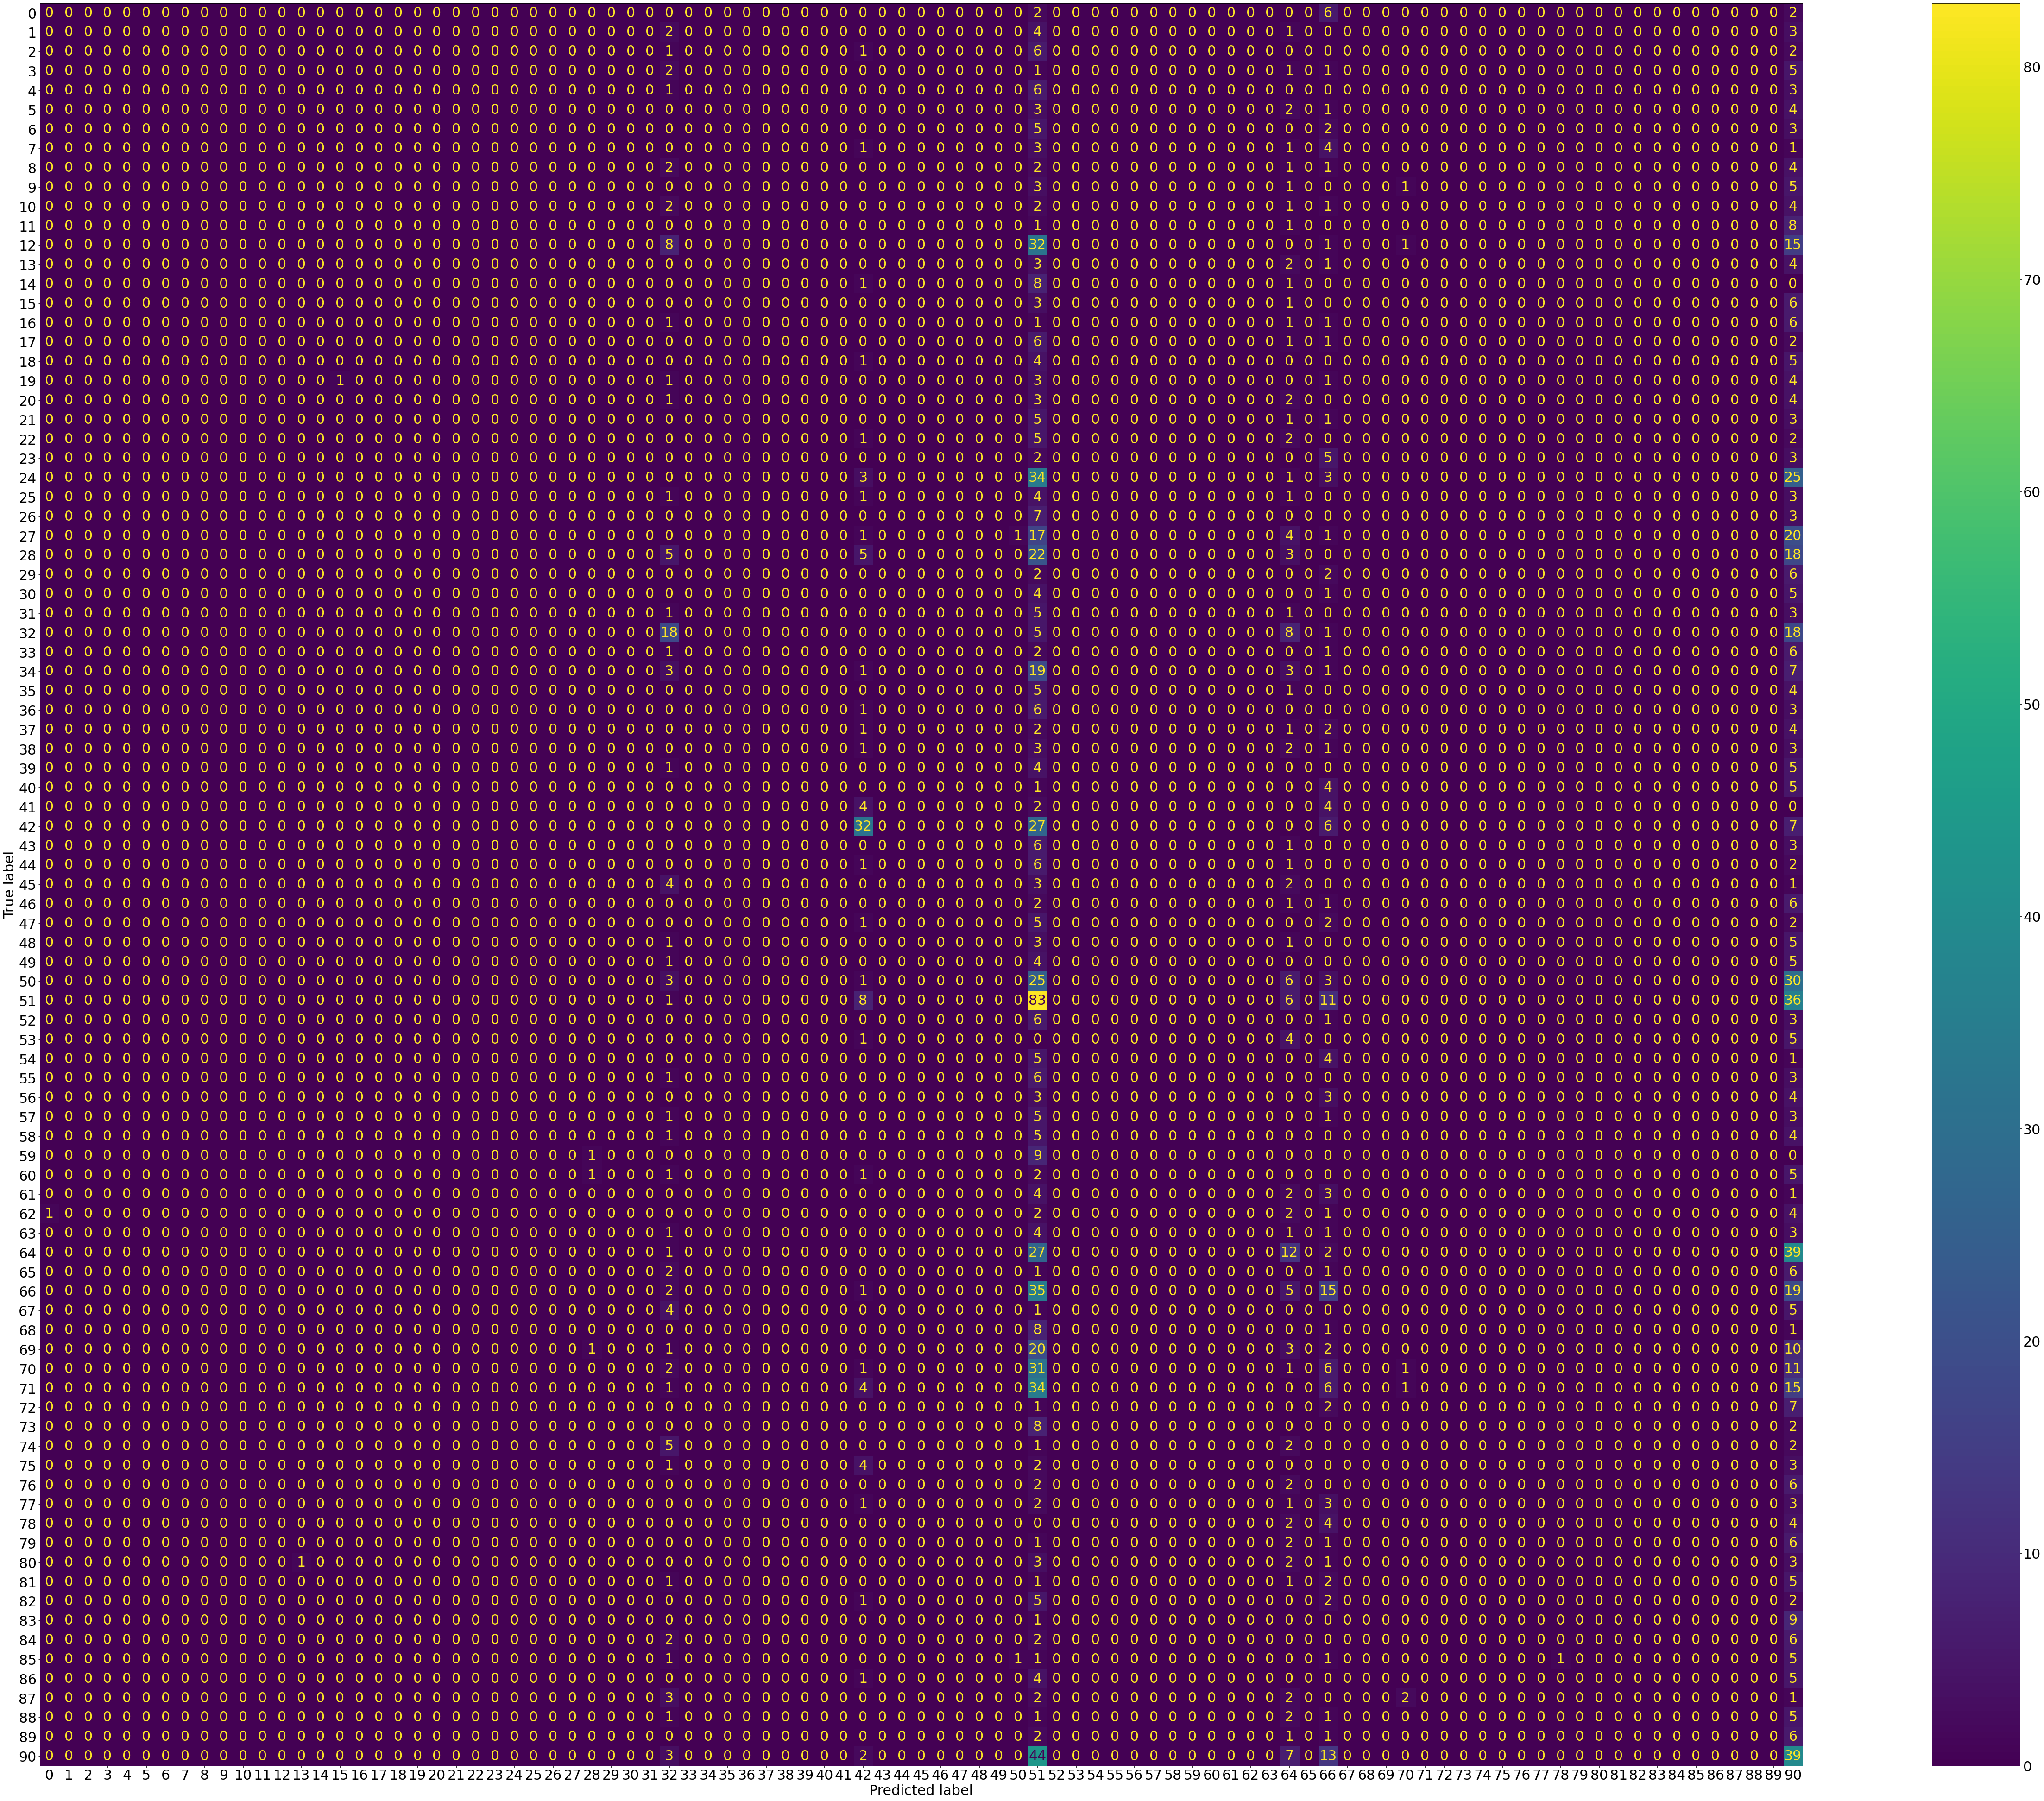

In [52]:
# random, test data both

y_pred = model.predict(test_data_both, data_both_size/(batch_size))
y_pred = np.argmax(y_pred, axis=1)

label_list = list(range(data_both_classes))

cm = confusion_matrix(test_data_both.classes, y_pred, labels=label_list)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.rcParams.update({'figure.figsize': (100, 70 )})
plt.rcParams.update({'font.size': 30})
plt.show()

In [48]:
print(classification_report(test_data_both.classes, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.00      0.00      0.00        10
           2       0.00      0.00      0.00        10
           3       0.00      0.00      0.00        10
           4       0.00      0.00      0.00        10
           5       0.00      0.00      0.00        10
           6       0.00      0.00      0.00        10
           7       0.00      0.00      0.00        10
           8       0.00      0.00      0.00        10
           9       0.00      0.00      0.00        10
          10       0.00      0.00      0.00        10
          11       0.00      0.00      0.00        10
          12       0.00      0.00      0.00        57
          13       0.00      0.00      0.00        10
          14       0.00      0.00      0.00        10
          15       0.00      0.00      0.00        10
          16       0.00      0.00      0.00        10
          17       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
